In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.append('../')
from src.data import train_val_test_split
from src.data import get_descriptor_and_labels
from src.plotting import plot_confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Benchmark Classification Models

We train a number of baseline classification models and compare with the performance of the NN

### Load in the training, validation and testing data

In [2]:
train_structs, val_structs, test_structs = train_val_test_split()

In [3]:
numb_train_samples = 8_000
train_x, train_y, label_mapping = get_descriptor_and_labels(train_structs,num_samples_per_type=numb_train_samples)
val_x, val_y, _ = get_descriptor_and_labels(val_structs, num_samples_per_type=2_500)
test_x, test_y, _ = get_descriptor_and_labels(test_structs, num_samples_per_type=2_500)

# need to convert one-hot vectors to integers
train_y = np.argmax(train_y,axis=1)
val_y = np.argmax(val_y,axis=1)
test_y = np.argmax(test_y,axis=1)

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_val_x = scaler.transform(val_x)
scaled_test_x = scaler.transform(test_x)

### Logistic Regression

Accuracy = 85.0%


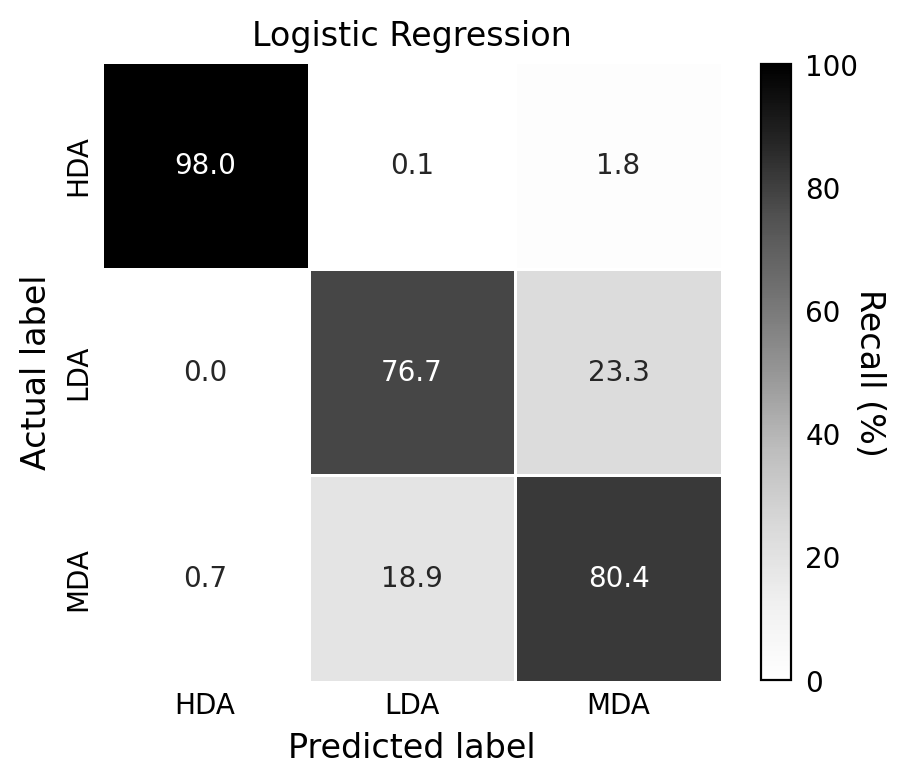

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

model = LogisticRegression(random_state=0,max_iter=200)
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y,regression_name='Logistic Regression')
# plt.savefig('../figures/logistic_regression.svg',dpi=300,bbox_inches='tight')

### Naive Bayes

Accuracy = 84.2%


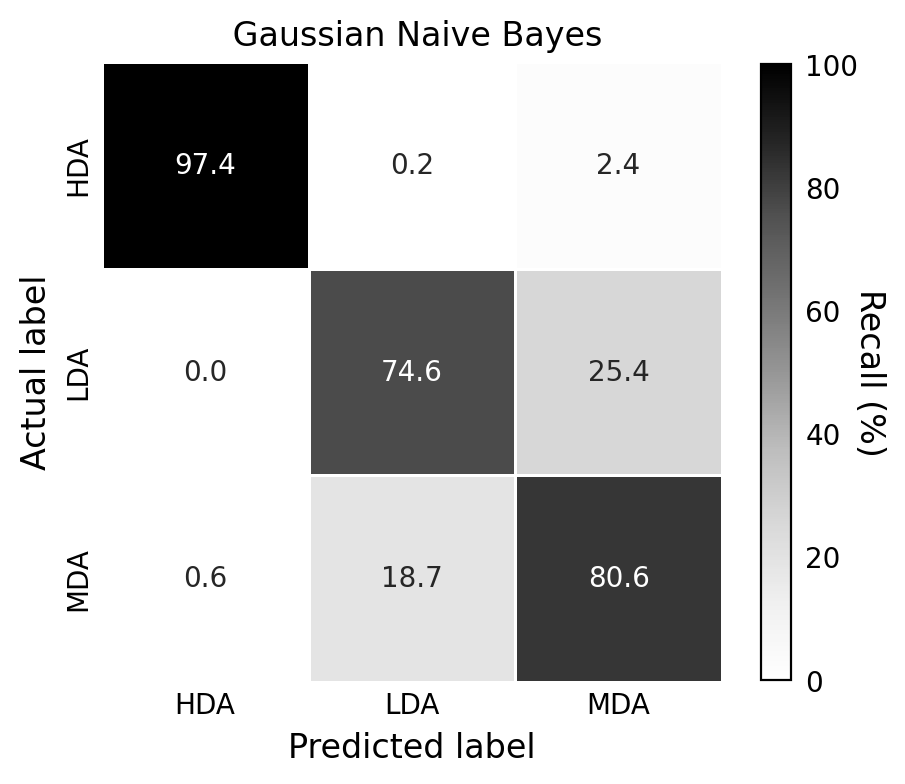

In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name=' Gaussian Naive Bayes')
# plt.savefig('../figures/gaussian_naive_bayes.svg',dpi=300,bbox_inches='tight')

Accuracy = 80.7%


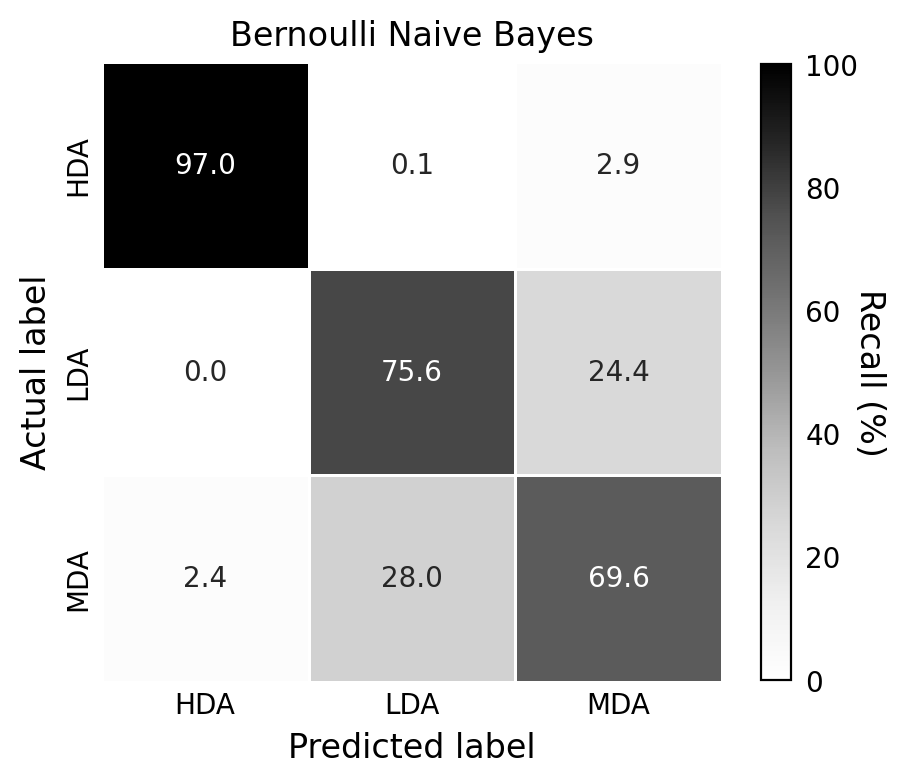

In [8]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='Bernoulli Naive Bayes')
# plt.savefig('../figures/bernoulli_naive_bayes.svg',dpi=300,bbox_inches='tight')

### K-nearest neighbours

Accuracy = 80.3%


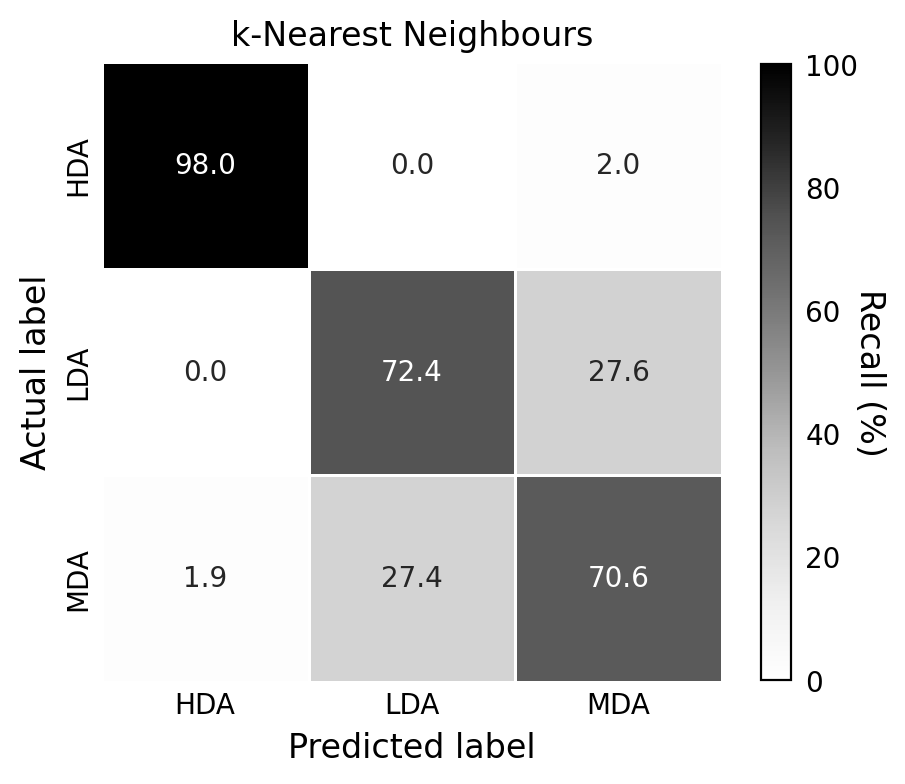

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# for n in [2,4,8,16,32]:
model = KNeighborsClassifier(n_neighbors=5)
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='k-Nearest Neighbours')
# plt.savefig('../figures/knn.svg',dpi=300,bbox_inches='tight')

### Decision Trees

Accuracy = 75.7%


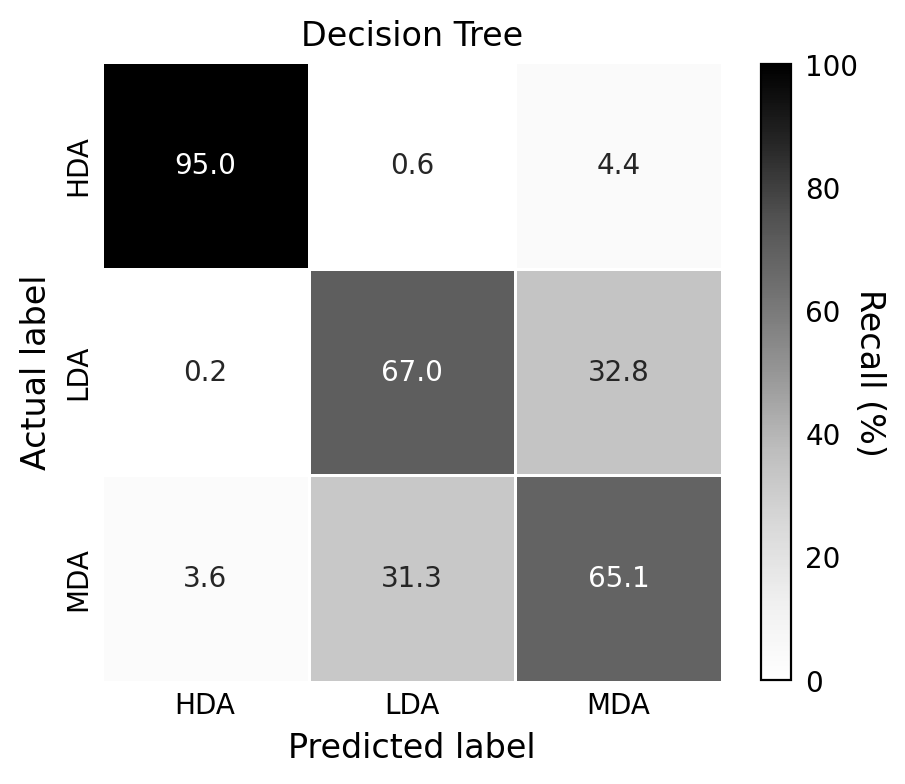

In [10]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='Decision Tree')
# plt.savefig('../figures/decision_tree.png',dpi=300,bbox_inches='tight')

### Random Forest

Accuracy = 84.9%


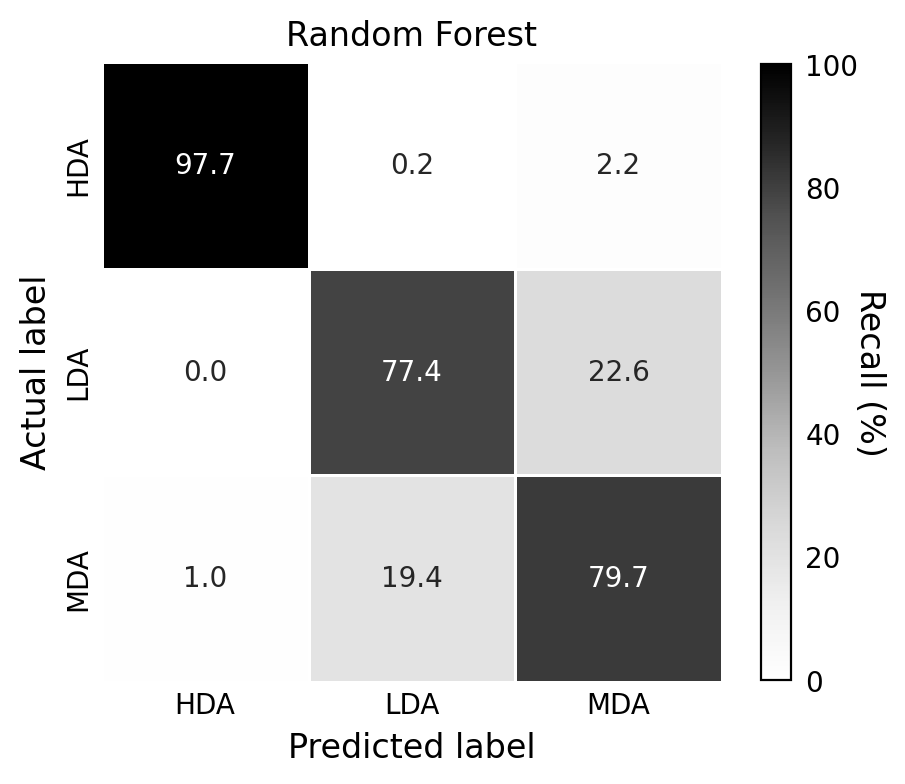

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0,n_estimators=300)
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='Random Forest')
# plt.savefig('../figures/random_forest.svg',dpi=300,bbox_inches='tight')

### Support Vector Machines

Accuracy = 84.9%


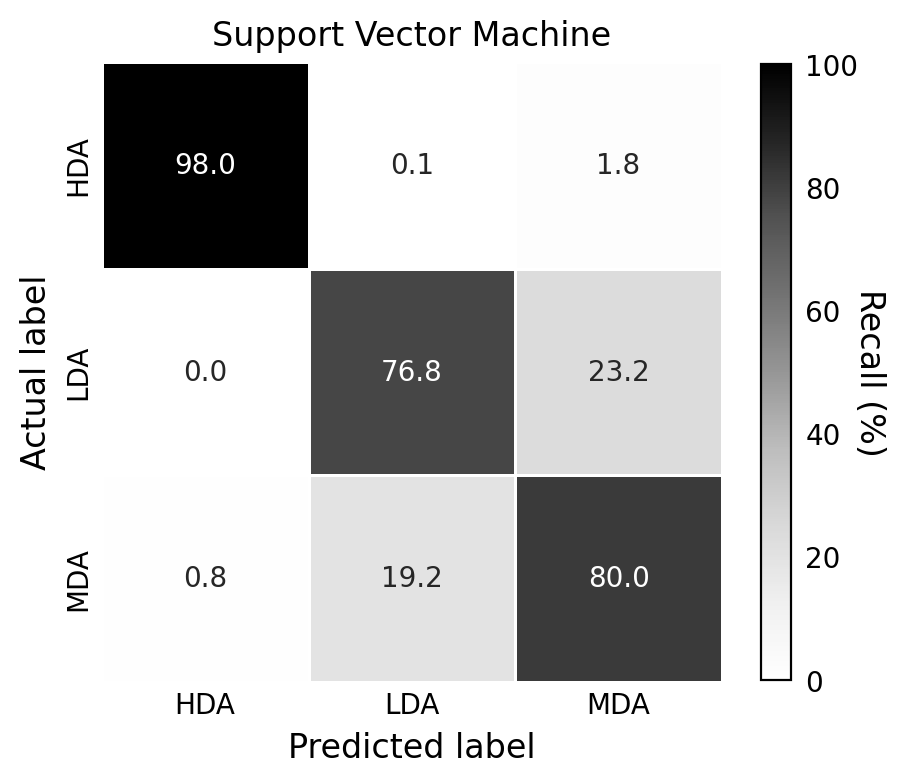

In [12]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='Support Vector Machine')
# plt.savefig('../figures/svm.png',dpi=300,bbox_inches='tight')

Accuracy = 83.8%


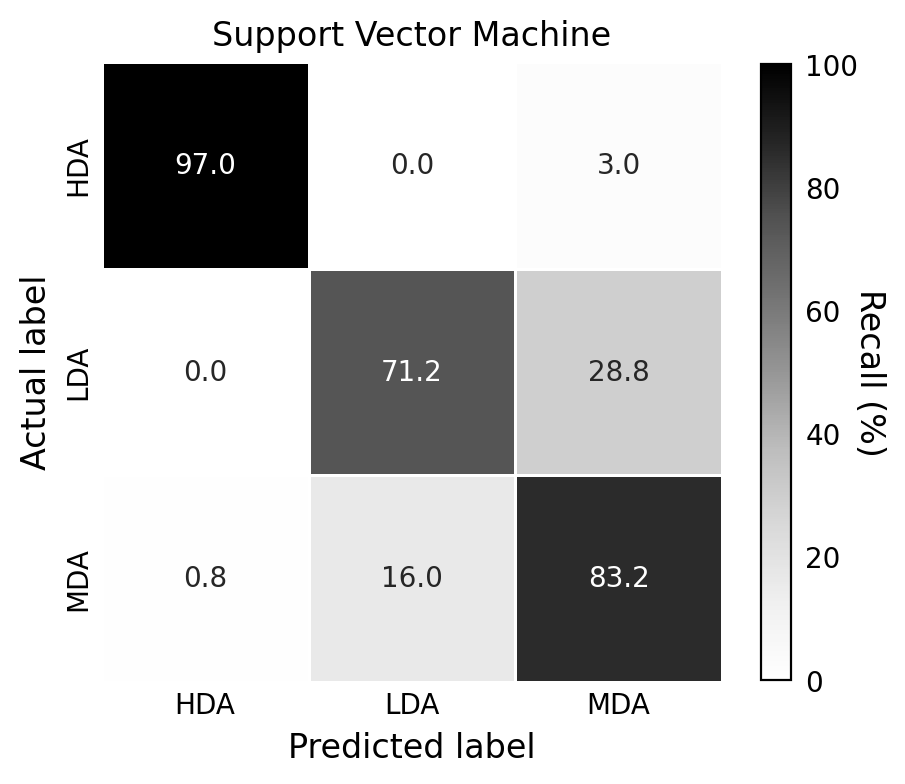

In [13]:
model = SVC(kernel='poly')
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='Support Vector Machine')

Accuracy = 85.1%


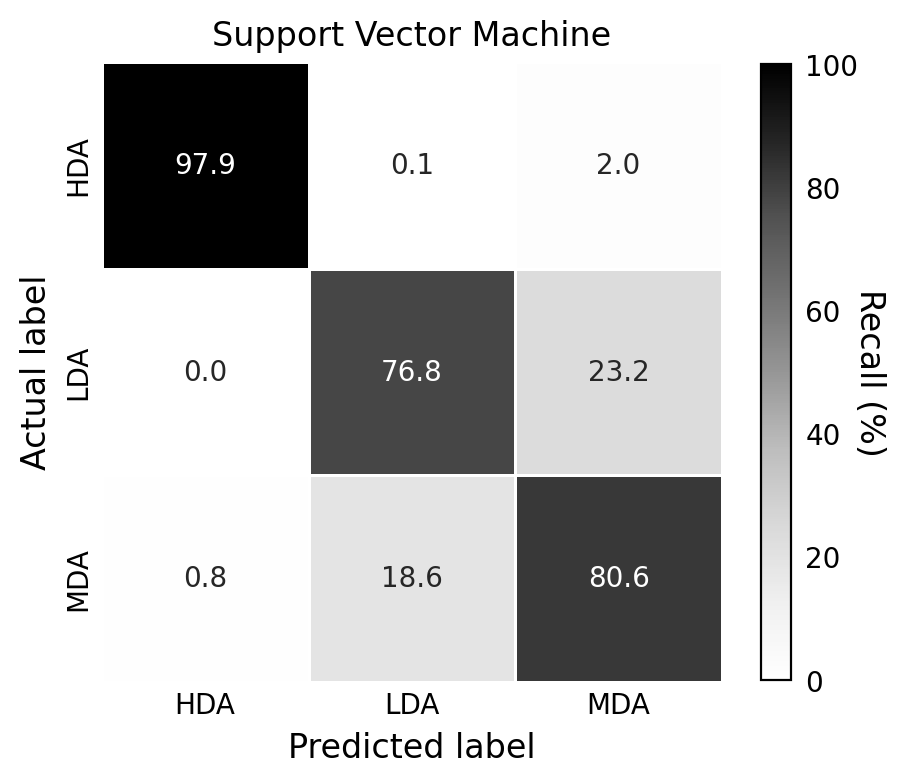

In [14]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
model = SVC(kernel='rbf')
plot_confusion_matrix(model,scaled_train_x, train_y, scaled_test_x, test_y, regression_name='Support Vector Machine')
# plt.savefig('../figures/svm.svg',dpi=300,bbox_inches='tight')